In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Are Populists Truly More Concerned with Democracy? 
## An Analysis of the Incidence of Key Words Relating to Democracy on the Official Websites of German Political Parties

This work attempts to answer, at least in part, the question of whether populist parties are more concerned with democracy than other political parties, based primarily on the writings of Mudde and Kaltwasser. I used a web scraper to count the occurrence of words on the official websites of three political parties in Germany, one populist and two not, and compared the incidence of key words related to democracy and populism from pre-determined lists. I posited three hypotheses: first, that the AfD website will have a greater incidence of populism-related words than the CDU and the SPD websites, which supports the assertion that the AfD is a populist party; second, that the AfD will have more overall results of democracy-related terms than the other parties, which shows a higher surface level interest in democracy, compared to the more traditional mainstream parties of the CDU and SPD; and third, that the incidence of democracy-related words on the AfD website would be dwarfed by the incidence of immigration-related words, showing that the AfD, while concerned with democracy, is more concerned with immigration, as they are most commonly considered to be. My analysis will find that, based on the significantly higher incidence of populism- and democracy-related key-words, the AfD qualifies as a populist party, and demonstrates a higher surface-level concern with democracy and democratic deficit than the CDU, which supports the characterization of populist parties as highly concerned with democratic legitimacy. My analysis will also show that the AfD is not more concerned with immigration on a surface level than democracy, gleaned from the much higher incidence of democracy-related words than immigration-related words. 

## Definition of Terms

The initial characterization of populism as democratic extremism, and the parties of populists being more concerned with democracy than non-populist parties, requires explanation. While a more thorough discussion of populism is beyond the scope of this project, I seek to offer here at least a foundation of the term and attempts to study it over the years. Populism is a difficult phenomenon to define, as it has been co-opted, used and defined by many over the years, often for very different reasons, with some doubting the veracity or usefulness of the term entirely (see Germani, 1978, pg. 5 and Mair, 2002, pg. 6, cited in Mudde and Kaltwasser, 2012, and Albertazzi and McDonnell, 2008, pg. 3, for examples). However, Cas Mudde and Rovira Kaltwasser crystallize the various definitions of populism into a unified whole. Based on the observation that practically all definitions of populism include the division of society into opposing groups, an anti-elitist sentiment, and an exaltation of the common people, they define populism as “a thin-centred [sic] ideology that considers society to be ultimately separated into two homogeneous and antagonistic groups, ‘the pure people’ and ‘the corrupt elite,’ and which argues that politics should be an expression of the volonté générale (general will) of the people” (2012, pg. 8). This definition emphasizes the democratic legitimacy of the rulers, and that majority opinion is the basis of all legitimate governance; the ‘general will of the people’. This definition paints populism as being overtly concerned with democracy.

This work builds on and heavily borrows from previous writing I have done on populism in Europe. In previous essays I explored the topic from a qualitative, more theoretical standpoint. In the following project I sought to add a quantitative element to the study, and performed a key word analysis, counting the occurrence of words related to populism on the official websites of three political parties in Germany: the Alternative für Deutschland (Alternative for Germany; AfD), the Christliche Demokratische Union (Christian Democratic Union; CDU) and the Sozialdemokratische Partei Deutschlands (Social-Democratic Party of Germany; SPD). These three parties were chosen as they represent in Germany, respectively, the recently-founded, main populist party which was until very recently a political outsider (Dilling, 2018); and the two mainstream center-right (CDU) and center-left (SPD) parties in Germany. They therefore most clearly represented the divide between populism and mainstream politics within a single country (in this case, Germany). 

## Methods and Word Choice
The main method was to build a web scraper with Python and Selenium, find key words, put them in an SQLite database, and then use the Pandas and Matplotlib modules to parse and visually represent the data.

Chrome webdriver was used as the webdriver for Selenium, and initialised with `driver = webdriver.Chrome()`. Then, the database was created like so:

```
def make_tables():
    conn = sqlite3.connect("PoliticalPartyWebScraper.db")
    c = conn.cursor()
    
    c.execute("""CREATE TABLE populist_words_from_afd (
        page_url text,
        page_title text,
        word text
    )""")
    c.execute("""CREATE TABLE populist_words_from_spd (
        page_url text,
        page_title text,
        word text
    )""")
    c.execute("""CREATE TABLE populist_words_from_cdu (
        page_url text,
        page_title text,
        word text
    )""")
    
    c.execute("""CREATE TABLE democracy_words_from_afd (
        page_url text,
        page_title text,
        word text
    )""")
    c.execute("""CREATE TABLE democracy_words_from_spd (
        page_url text,
        page_title text,
        word text
    )""")
    c.execute("""CREATE TABLE democracy_words_from_cdu (
        page_url text,
        page_title text,
        word text
    )""")

    c.execute("""CREATE TABLE immigration_words_from_afd (
        page_url text,
        page_title text,
        word text
    )""")

    conn.commit()
    conn.close()


make_tables()
```

The webscraper itself can be found in `Main.py`

The official websites were chosen primarily because all three of the political parties have websites, and all the websites convey their platform in an organized manner and place, allowing for a relative equivalence in determining what their values are. Furthermore, while one of the parties (AfD) has a publicly available full platform in .pdf format, which would have given a more complete look at the party’s values, neither of the other parties had such a thing, which means the analysis would not be equivalent. Key word analysis was chosen as the method of research primarily because defining a list of key words and then counting their occurrences is an objective measure, which cuts down on (but does not wholly prevent) bias. As a measure of some legitimacy, key word analysis has been used as a method of study in academia elsewhere, such as in the analysis by Josep Soler on the language of predatory vs. non-predatory journals (2019). This method is also referenced/used in The Oxford Handbook of Political Methodology (Box-Steffensmeier, et al. 2009). 

The lists of key words are below:
```
democracy_key_words = ['Demokratie', 'demokratisch', 'demokratische', 'demokratischen', 'Demokratisch', 'Demokratische',
'Demokratischen', 'Bürger', 'Bürgern', 'Bürgerin', 'Bürgerinnen', 'Person', 'Personen', 'Volksabstimmung', 'Volksabstimmungen', 'Abstimmung', 'Abstimmungen', 'abstimmen', 'souverän', 'souveränen', 'Souveränität']

populism_key_words = ['Volk', 'Volke', 'völkisch', 'völkische', 'völkisches', 'Elite', 'Eliten', 'Elitegruppen', 'Person', 'Personen', 'souverän', 'souveränen', 'Souveränität', 'Korruption', 'korrupt', 'korrupte', 'korrupten', 'korruptes', 'bestechlich', 'bestechliche', 'bestechlichen', 'bestechliches']

immigration_key_words = ['Islam', 'Muslim', 'Muslimem', 'Islamisierung', 'Immigration', 'Einwanderung', 'Immigrant', 'Immigranten', 'Einwanderer', 'einwandern']
```

The key words were chosen admittedly somewhat arbitrarily; the words directly related to democracy (Demokratie, demokratisch, etc.) should be uncontroversial, but some of the words chosen to represent democracy as an ideal may not be, and this will vary from reader to reader. As a general rule, due to the overlap between words related to democracy and words related to populism, populism-related words are most commonly those that refer to the dichotomy between the moral people and the corrupt elite, and the concept of national sovereignty. Some words are fits for both categories, and such words are usually counted in both. Some culling has been done already; words that occurred on the AfD website in significant quantities, such as ‘Volk’ and variations thereof, were excluded from the list of democracy-related words because they carry connotations of nativism and have a historical baggage which is not related to democracy per se. Instead, this word has been placed in the category of ‘words related to populism’, the list `populism_key_words`. 

For the words related to immigration, most of the word choices should be self-explanatory, but those related to Islam deserve a more in-depth explanation. As the largest proportion of those refugees and immigrants coming to Europe in the 21st Century, and to Germany in particular, are Muslim, there is an association in Germany between Islam and immigration (“The Growth of Germany’s Muslim Population,” 2017). As such, to have a complete review of the key words on the AfD website, it is necessary to include words related to Islam, as to exclude such words would mean ignoring a large proportion of the words related to immigration, and may create a skewed impression. This author hopes that if the reader wishes to conduct an analysis with different or additional words, they feel free to do so.

Below we create the connection to the existing database created earlier, `PoliticalPartyWebScraper.db`:

In [2]:
conn = sqlite3.connect("PoliticalPartyWebScraper.db")

Here, we read the words from the database, organized by type; democracy-, populism-, and immigration-related words:

In [3]:
# Read all democracy related words from the database
afd_query_demo = pd.read_sql_query("""
        SELECT word, page_title 
        FROM democracy_words_from_afd
        """, conn)
cdu_query_demo = pd.read_sql_query("""
        SELECT word, page_title 
        FROM democracy_words_from_cdu
        """, conn)
spd_query_demo = pd.read_sql_query("""
        SELECT word, page_title 
        FROM democracy_words_from_spd
        """, conn)

afd_query_demo_specific = pd.read_sql_query("""
        SELECT word, page_title 
        FROM democracy_words_from_afd
        WHERE word LIKE '%emokr%'
        """, conn)
cdu_query_demo_specific = pd.read_sql_query("""
        SELECT word, page_title 
        FROM democracy_words_from_cdu
        WHERE word LIKE '%emokr%'
        """, conn)

In [4]:
# Read all populism related words from the database
afd_query_pop = pd.read_sql_query("""
        SELECT word, page_title 
        FROM populist_words_from_afd
        """, conn)
cdu_query_pop = pd.read_sql_query("""
        SELECT word, page_title 
        FROM populist_words_from_cdu
        """, conn)
spd_query_pop = pd.read_sql_query("""
        SELECT word, page_title 
        FROM populist_words_from_spd
        """, conn)

In [5]:
# Read all immigration-related words from the database
afd_query_immigration = pd.read_sql_query("""
        SELECT word, page_title
        FROM immigration_words_from_afd
        """, conn)

Here, we transform the key word results from above into `pandas` dataframes, to be easier to work with and visualize:

In [6]:
# democracy-related words as dataframes
df_afd_demo = pd.DataFrame(afd_query_demo, columns=['word'])
df_cdu_demo = pd.DataFrame(cdu_query_demo, columns=['word'])
df_spd_demo = pd.DataFrame(spd_query_demo, columns=['word'])

# democracy-related words that have 'democracy' as the root as dataframes
df_afd_demo_specific = pd.DataFrame(afd_query_demo_specific, columns=['word'])
df_cdu_demo_specific = pd.DataFrame(cdu_query_demo_specific, columns=['word'])

# populism-related words as dataframes
df_afd_pop = pd.DataFrame(afd_query_pop, columns=['word'])
df_cdu_pop = pd.DataFrame(cdu_query_pop, columns=['word'])
df_spd_pop = pd.DataFrame(spd_query_pop, columns=['word'])

# immigration-related words as a dataframe
df_afd_immigration = pd.DataFrame(afd_query_immigration, columns=['word'])

We are now able to use the dataframes to create different graphs, which is useful for our next stage, the analysis and visualization of the data. 

## Webscraper Results and Analysis
This analysis hinges on the AfD being a populist party, which is supported by the results of the web scraping.  

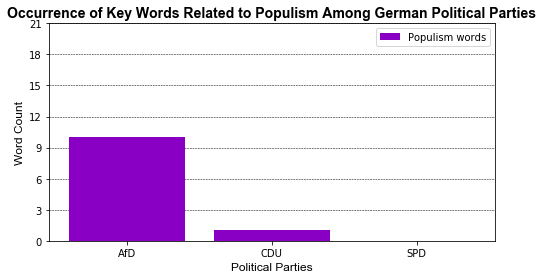

In [8]:
# Graph for populism-related key words
plt.figure(figsize=(8, 4))

labels_pop = ['AfD', 'CDU', 'SPD']
values_pop = [len(df_afd_pop), len(df_cdu_pop), len(df_spd_pop)]
plt.bar(labels_pop, values_pop, color='#8900c4', label='Populism words', zorder=2)

plt.yticks(range(len(df_afd_demo))[::3])
plt.grid(axis='y', color='black', linestyle='--', linewidth=0.5, zorder=1)
plt.xlabel('Political Parties', fontdict={'fontname': 'Arial', 'fontsize': 12})
plt.ylabel('Word Count', fontdict={'fontname': 'Arial', 'fontsize': 12})

plt.title("Occurrence of Key Words Related to Populism Among German Political Parties",
          fontdict={'fontname': 'Arial', 'fontweight': 'bold', 'fontsize': 14})

plt.legend()
plt.show()

The figure above shows the occurrence of key words related to populism between the three parties. The AfD, with ten, has the most, while the CDU has only a single occurrence, and the SPD has none at all. This stark disparity shows the AfD’s rhetoric is clearly more populist in nature. Therefore, for the purposes of the study, the AfD can be characterized as a populist party. 

This makes the next part of the analysis more relevant. As a populist party, the AfD can be used as a representative to answer the main question, that is, whether populist parties are more concerned with democracy than other political parties. Based on the results of the web scraping below, the answer appears to be a resounding ‘yes.’

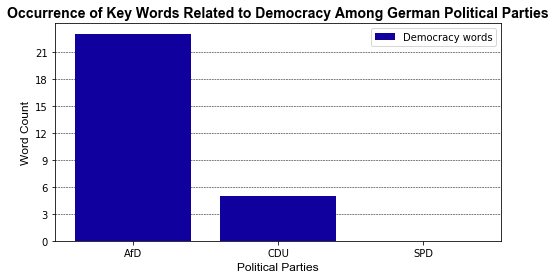

In [9]:
# Graph for democracy-related key words
plt.figure(figsize=(8, 4))

labels_demo = ['AfD', 'CDU', 'SPD']
values_demo = [len(df_afd_demo), len(df_cdu_demo), len(df_spd_demo)]
plt.bar(labels_demo, values_demo, color='#10009e', label='Democracy words', zorder=2)

plt.yticks(range(len(df_afd_demo))[::3])
plt.grid(axis='y', color='black', linestyle='--', linewidth=0.5, zorder=1)
plt.xlabel('Political Parties', fontdict={'fontname': 'Arial', 'fontsize': 12})
plt.ylabel('Word Count', fontdict={'fontname': 'Arial', 'fontsize': 12})

plt.title("Occurrence of Key Words Related to Democracy Among German Political Parties",
          fontdict={'fontname': 'Arial', 'fontweight': 'bold', 'fontsize': 14})

plt.legend()
plt.show()

Words related to democracy occur on the AfD platform pages twenty-three times, versus five for the CDU. Like for populism, the SPD has no words related to democracy on its website. This shows that the AfD expresses concern for democracy at a higher rate in its rhetoric compared to other parties. However, there is a potential wrinkle in that assessment.

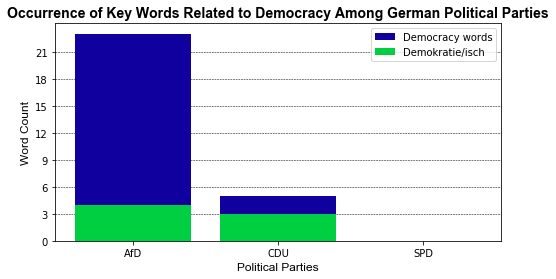

In [10]:
# Graph for democracy-related key words
plt.figure(figsize=(8, 4))

labels_demo = ['AfD', 'CDU', 'SPD']
values_demo = [len(df_afd_demo), len(df_cdu_demo), len(df_spd_demo)]
plt.bar(labels_demo, values_demo, color='#10009e', label='Democracy words', zorder=2)

labels_demo_specific = ['AfD', 'CDU']
values_demo_specific = [len(df_afd_demo_specific), len(df_cdu_demo_specific)]
plt.bar(labels_demo_specific, values_demo_specific, color='#00cf41', label='Demokratie/isch', zorder=2)

plt.yticks(range(len(df_afd_demo))[::3])
plt.grid(axis='y', color='black', linestyle='--', linewidth=0.5, zorder=1)
plt.xlabel('Political Parties', fontdict={'fontname': 'Arial', 'fontsize': 12})
plt.ylabel('Word Count', fontdict={'fontname': 'Arial', 'fontsize': 12})

plt.title("Occurrence of Key Words Related to Democracy Among German Political Parties",
          fontdict={'fontname': 'Arial', 'fontweight': 'bold', 'fontsize': 14})

plt.legend()
plt.show()

The above graph shows that when the democracy related words is whittled to just ‘Demokratie’ and related variants (‘demokratisches’, etc.) the difference is much smaller, at least between the AfD, with four occurrences, and the CDU, with three. While not enough to invalidate the previous results, it does weaken the argument somewhat that the AfD is significantly more concerned with democracy and democratic legitimacy. Still, the sheer number of other mentions supports the initial hypothesis. 

One possible explanation for a relative, or in the case of the SPD, complete, lack of democratic language for the CDU and SPD, is that, as mainstream parties, they believe that their status as democratically legitimate is a given, so they do not spend time discussing that topic, whereas the AfD, as the literature argues, is based on a claim of a lack of mainstream democratic legitimacy and so focuses more on the issue, leading to a higher incidence of related key words. The AfD, as a relative newcomer, also has more to prove and must convince the electorate with rhetoric that it is legitimate. 

Having determined that the AfD indeed shows greater concern for democracy than the other parties, the next test of the AfD would be to determine whether their concern for democracy is greater than or equal to their concern for immigration. As right-wing populist parties in Europe tend to be seen as anti-immigration, with an ethno-nationalist bend (Dale, 2017, p. 15), the expectation is for the occurrence of key words relating to immigration and Islam to be high. A fixation on immigration over democracy would possibly undermine the overall argument that the AfD is primarily concerned with democratic legitimacy. To this author’s admitted surprise, when the number of words related to immigration were queried, it was found that they were dwarfed by the words related to populism, 5 to 1:

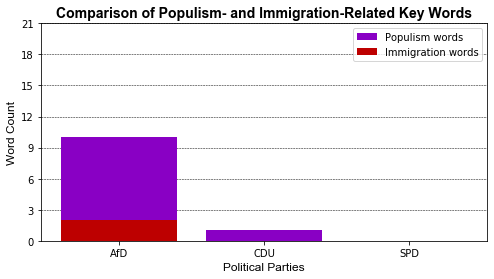

In [11]:
# Graph for populism-related key words compared to immigration-related key words
plt.figure(figsize=(8, 4))

labels_pop = ['AfD', 'CDU', 'SPD']
values_pop = [len(df_afd_pop), len(df_cdu_pop), len(df_spd_pop)]
plt.bar(labels_pop, values_pop, color='#8900c4', label='Populism words', zorder=2)

labels_immigration = ['AfD', 'CDU', 'SPD']
values_immigration = [len(df_afd_immigration), 0, 0]
plt.bar(labels_immigration, values_immigration, color='#bd0000', label='Immigration words', zorder=2)

plt.yticks(range(len(df_afd_demo))[::3])
plt.grid(axis='y', color='black', linestyle='--', linewidth=0.5, zorder=1)
plt.xlabel('Political Parties', fontdict={'fontname': 'Arial', 'fontsize': 12})
plt.ylabel('Word Count', fontdict={'fontname': 'Arial', 'fontsize': 12})

plt.title("Comparison of Populism- and Immigration-Related Key Words",
          fontdict={'fontname': 'Arial', 'fontweight': 'bold', 'fontsize': 14})

plt.legend()
plt.show()

And comparing words related to democracy, the difference was even starker:

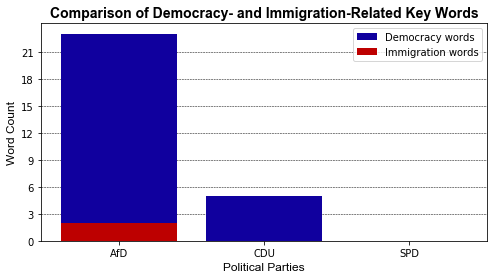

In [12]:
# Comparison of democracy-related key words and immigration-related key words
plt.figure(figsize=(8, 4))

labels_demo = ['AfD', 'CDU', 'SPD']
values_demo = [len(df_afd_demo), len(df_cdu_demo), len(df_spd_demo)]
plt.bar(labels_demo, values_demo, color='#10009e', label='Democracy words', zorder=2)

labels_immigration = ['AfD', 'CDU', 'SPD']
values_immigration = [len(df_afd_immigration), 0, 0]
plt.bar(labels_immigration, values_immigration, color='#bd0000', label='Immigration words', zorder=2)

plt.yticks(range(len(df_afd_demo))[::3])
plt.grid(axis='y', color='black', linestyle='--', linewidth=0.5, zorder=1)
plt.xlabel('Political Parties', fontdict={'fontname': 'Arial', 'fontsize': 12})
plt.ylabel('Word Count', fontdict={'fontname': 'Arial', 'fontsize': 12})

plt.title("Comparison of Democracy- and Immigration-Related Key Words",
          fontdict={'fontname': 'Arial', 'fontweight': 'bold', 'fontsize': 14})

plt.legend()
plt.show()

The AfD website mentions democracy-related words 23 times, populism-related words 10 times, but immigration-related words are mentioned only 2 times. As previously mentioned, the AfD is generally seen as being preoccupied with immigration and cultural matters, so the severe lack of such mentions, especially compared to the things they do mention, is significant, and may paint a different picture of the AfD. Purely from this data, the AfD does appear to be genuinely far more concerned about democratic legitimacy than they are with immigration or culture, which supports Mudde and Kaltwasser’s assessment of populist parties. 

## Limitations and Future Research

There are admittedly limitations of this key word analysis method. Notably, key words only show what a group publicly expresses, not what its members really believe in private; it is entirely possible that a group expresses an ideal and does not follow through. Examining the difference between what a party expresses and what policies it votes for or introduces could be an interesting avenue for future research. It may also be useful to look through not only the official websites of these parties, but also their Twitter hashtags, key words in social media posts, and interviews with party leadership and rank and file party supporters.

Alternatively, it may be useful to compare the AfD's results with those from other less-mainstream parties, such as the Green Party, the Left Party ('die Linke'), or the FDP (Freie Demokratische Partei). Such a comparison may show whether the AfD is unique in its use of populist and democratic rhetoric compared to all German parties, or simply in comparison to the mainstream establishment. 

## Conclusion

The results of the web scraping show that the AfD references words related to democracy more than to words related to populism, as well as to immigration. This supports the hypothesis that the AfD is more overtly concerned with democracy than either of the two largest German mainstream political parties, the CDU and the SPD. This result supports the broader characterization by Mudde and Kaltwasser that populist political parties are highly concerned with democracy and democratic legitimacy, at least on the surface. While this analysis is not intended to be a ‘smoking gun’ for the democratic inclinations of the AfD, let alone populism as a whole, it is the author’s hope that this project can serve as a springboard for further research on the topic. 

# Appendix

## Populism Word List

-	Volk: people, folk
-	Volke: Volk, pl
-	völkisch: adjectival form of Volk
-	völkische: see above
-	völkisches: see above
-	Elite: elite
-	Eliten: elites
-	Elitegruppen: elite groups
-	Person: person
-	Personen: persons
-	souverän: sovereign
-	souveränen: sovereign
-	Souveränität: sovereignty
-	Korruption: corruption
-	korrupt: corrupt
-	korrupte: corrupt
-	korrupten: corrupt
-	korruptes: corrupt
-	bestechlich: corrupt, bribable
-	bestechliche: corrupt, bribable
-	bestechlichen: corrupt, bribable
-	bestechliches: corrupt, bribable 

## Democracy Word List

-	Demokratie: democracy
-	demokratisch: democratic
-	demokratische: democratic
-	demokratischen: democratic
-	Demokratisch: democratic
-	Demokratische: democratic
-	Demokratischen: democratic
-	Bürger: citizen
-	Bürgern: citizens
-	Bürgerin: citizen (female)
-	Bürgerinnen: citizens (female)
-	Person: person
-	Personen: persons
-	Volksabstimmung: popular vote
-	Volksabstimmungen: popular votes
-	Abstimmung: vote
-	Abstimmungen: votes
-	abstimmen: (verb) to vote
-	souverän: sovereign
-	souveränen: sovereign
-	Souveränität:  sovereignty 

## Immigration Word List

-	Islam
-	Muslim
-	Muslimem
-	Islamisierung
-	Immigration
-	Einwanderung
-	Immigrant
-	Immigranten
-	Einwanderer
-	einwandern

<b>For the raw webscraper results, see PoliticalPartyWebScraper.db</b>

# Works Cited

Albertazzi, Danielle and Duncan McDonnell, editors. (2008) Twenty-First Century Populism: The Spectre of Western European Democracy. Palgrave Macmillan.

Box-Steffensmeier, Janet M., Henry E. Brady and David Collier, editors. (2009). The Oxford Handbook of Political Methodology. Oxford University Press. 

Davis, Lewis and Sumit S. Deole. (2017) “Immigration and the Rise of Far-Right Parties in Europe.” IFO DICE Report, vol. 15, no. 4, pp. 10-15.

Dilling, Matthias. (2018) “Two of the Same Kind? The Rise of the AfD and its Implications for the CDU/CSU.” German Politics and Society, vol. 36, no. 1, pp. 84–104.

Mudde, Cas, and Rovira Kaltwasser, editors. (2012) Populism in Europe and the Americas: Threat or Corrective for Democracy? Cambridge University Press. 

Soler, Josep, and Ying Wang. (2019) “Linguistic differences between well‐established and predatory journals: a keyword analysis of two journals in political science.” Learned Publishing, vol. 32, no. 3, pp. 259-269. 

“The Growth of Germany’s Muslim Population.” (2017) Pew Research Group, https://www.pewforum.org/essay/the-growth-of-germanys-muslim-population/
